<a href="https://colab.research.google.com/github/raulbenitez/PRML_exploratory_analysis/blob/main/PRML_Exercise_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE: DIMENSIONALITY REDUCTION

# Task 1:  Load a Kaggle database:

Obtain a multivariate dataset with **numerical** features for classification problems from Kaggle ($n$ observations, $d$ features). Please avoid using the iris and cars databases.

https://www.kaggle.com/datasets?tags=13302-Classification


**Hints:**

1. If the database is aimed for classification, make sure to keep only the features and remove the class labels. The resulting matrix should be of size $m \times d$ with $m$ observations and $d$ attributes/variables/features.

2. If the database contains NaNs or missing values, apply a data imputation strategy (remove observations, replace by variable mean, multivariate imputation, etc). https://scikit-learn.org/stable/modules/impute.html

3. Not all databases are equally grateful, do not hesitate changing your mind if you experience reasonable trouble when solving the tasks below

In [22]:
import kagglehub
import seaborn as sns
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

df = pd.read_csv(path+"/train.csv")

# Display 5 rows
print("--------- First 5 rows: ---------")
print(df.head(5))

# Display info
print("\n--------- Dataframe info: ---------")
print(df.info())

# Count NaN values
print("\n--------- Count of NaN values --------- \n", df.isnull().sum().sum())

# Select some columns only (with one and only class label == price_range)
selected = ["battery_power", "clock_speed", "int_memory", "px_height", "px_width", "ram", "price_range"]
df = df[selected]

Path to dataset files: /home/fetty/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1
--------- First 5 rows: ---------
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786

In [23]:
# Possible imputation strategy
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit_transform(df)

# Task 2:  Data Exploration

a) Obtain the summary statistics for all the attributes

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

b) Visualize all the variables in the data set using a scatter plot matrix.

https://seaborn.pydata.org/generated/seaborn.pairplot.html

c) Use the class labels of the observations in order to represent the data as a class-grouped scatter plot matrix.

d) Compute the pairwise linear correlations between variables and represent the results as a correlation plot/heatmap.

https://seaborn.pydata.org/examples/many_pairwise_correlations.html



In [24]:
# Summary statistics
df.describe()

battery_power  clock_speed   int_memory    px_height     px_width  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     1.522250    32.046500   645.108000  1251.515500   
std       439.418206     0.816004    18.145715   443.780811   432.199447   
min       501.000000     0.500000     2.000000     0.000000   500.000000   
25%       851.750000     0.700000    16.000000   282.750000   874.750000   
50%      1226.000000     1.500000    32.000000   564.000000  1247.000000   
75%      1615.250000     2.200000    48.000000   947.250000  1633.000000   
max      1998.000000     3.000000    64.000000  1960.000000  1998.000000   

               ram  price_range  
count  2000.000000  2000.000000  
mean   2124.213000     1.500000  
std    1084.732044     1.118314  
min     256.000000     0.000000  
25%    1207.500000     0.750000  
50%    2146.500000     1.500000  
75%    3064.500000     2.250000  
max    3998.000000     3.000000

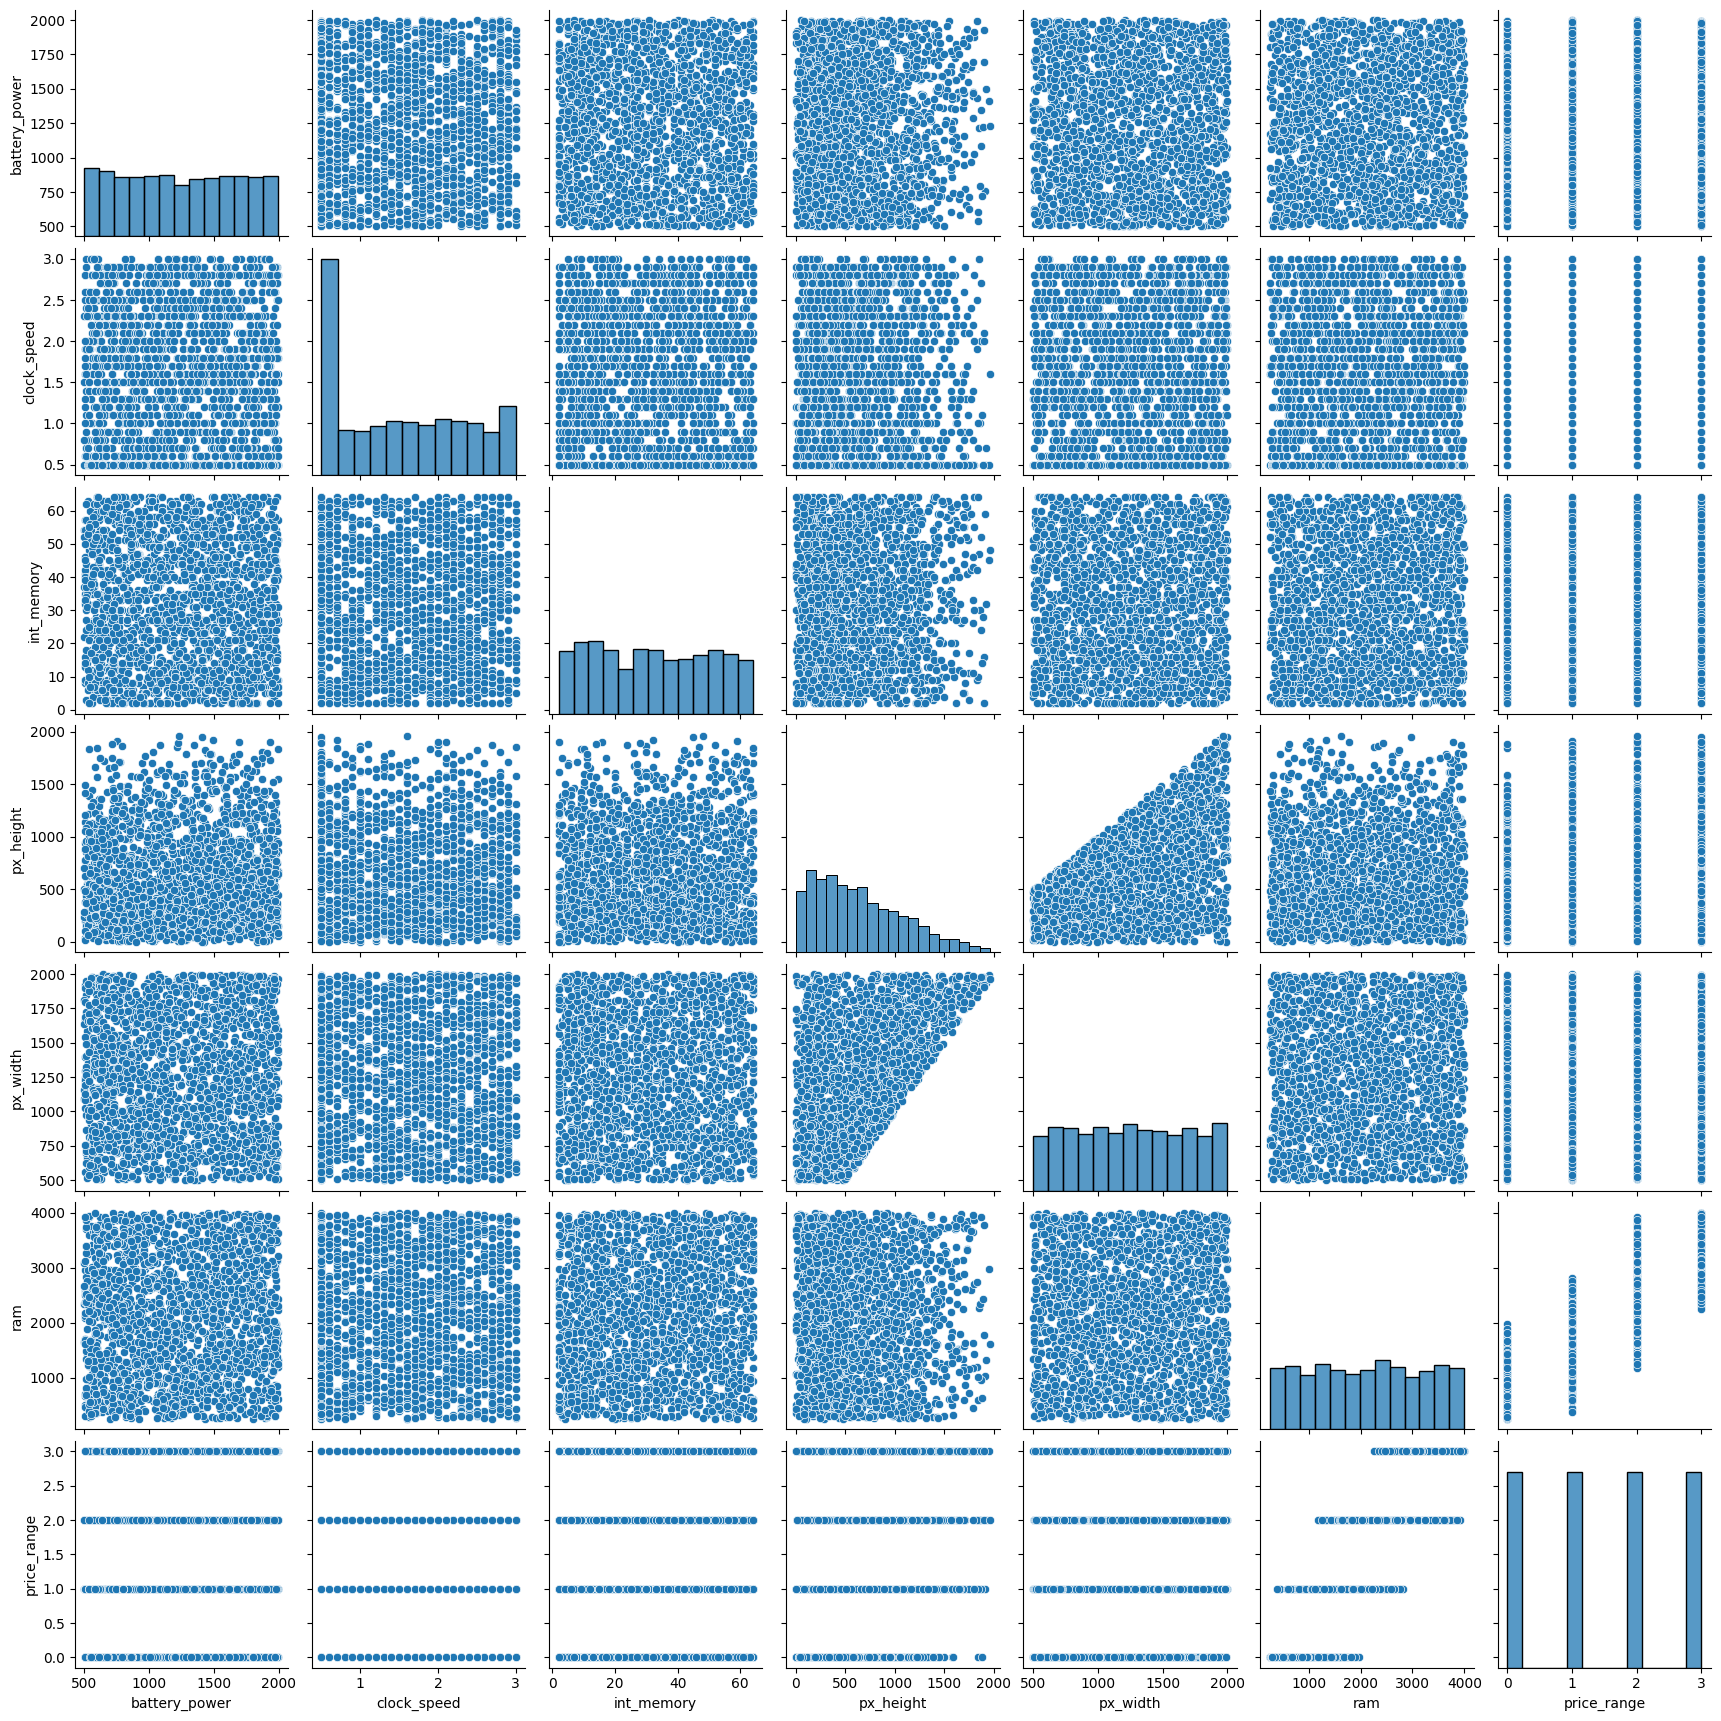

In [25]:
# Visualize via scatter plot matrix
p = sns.pairplot(df)

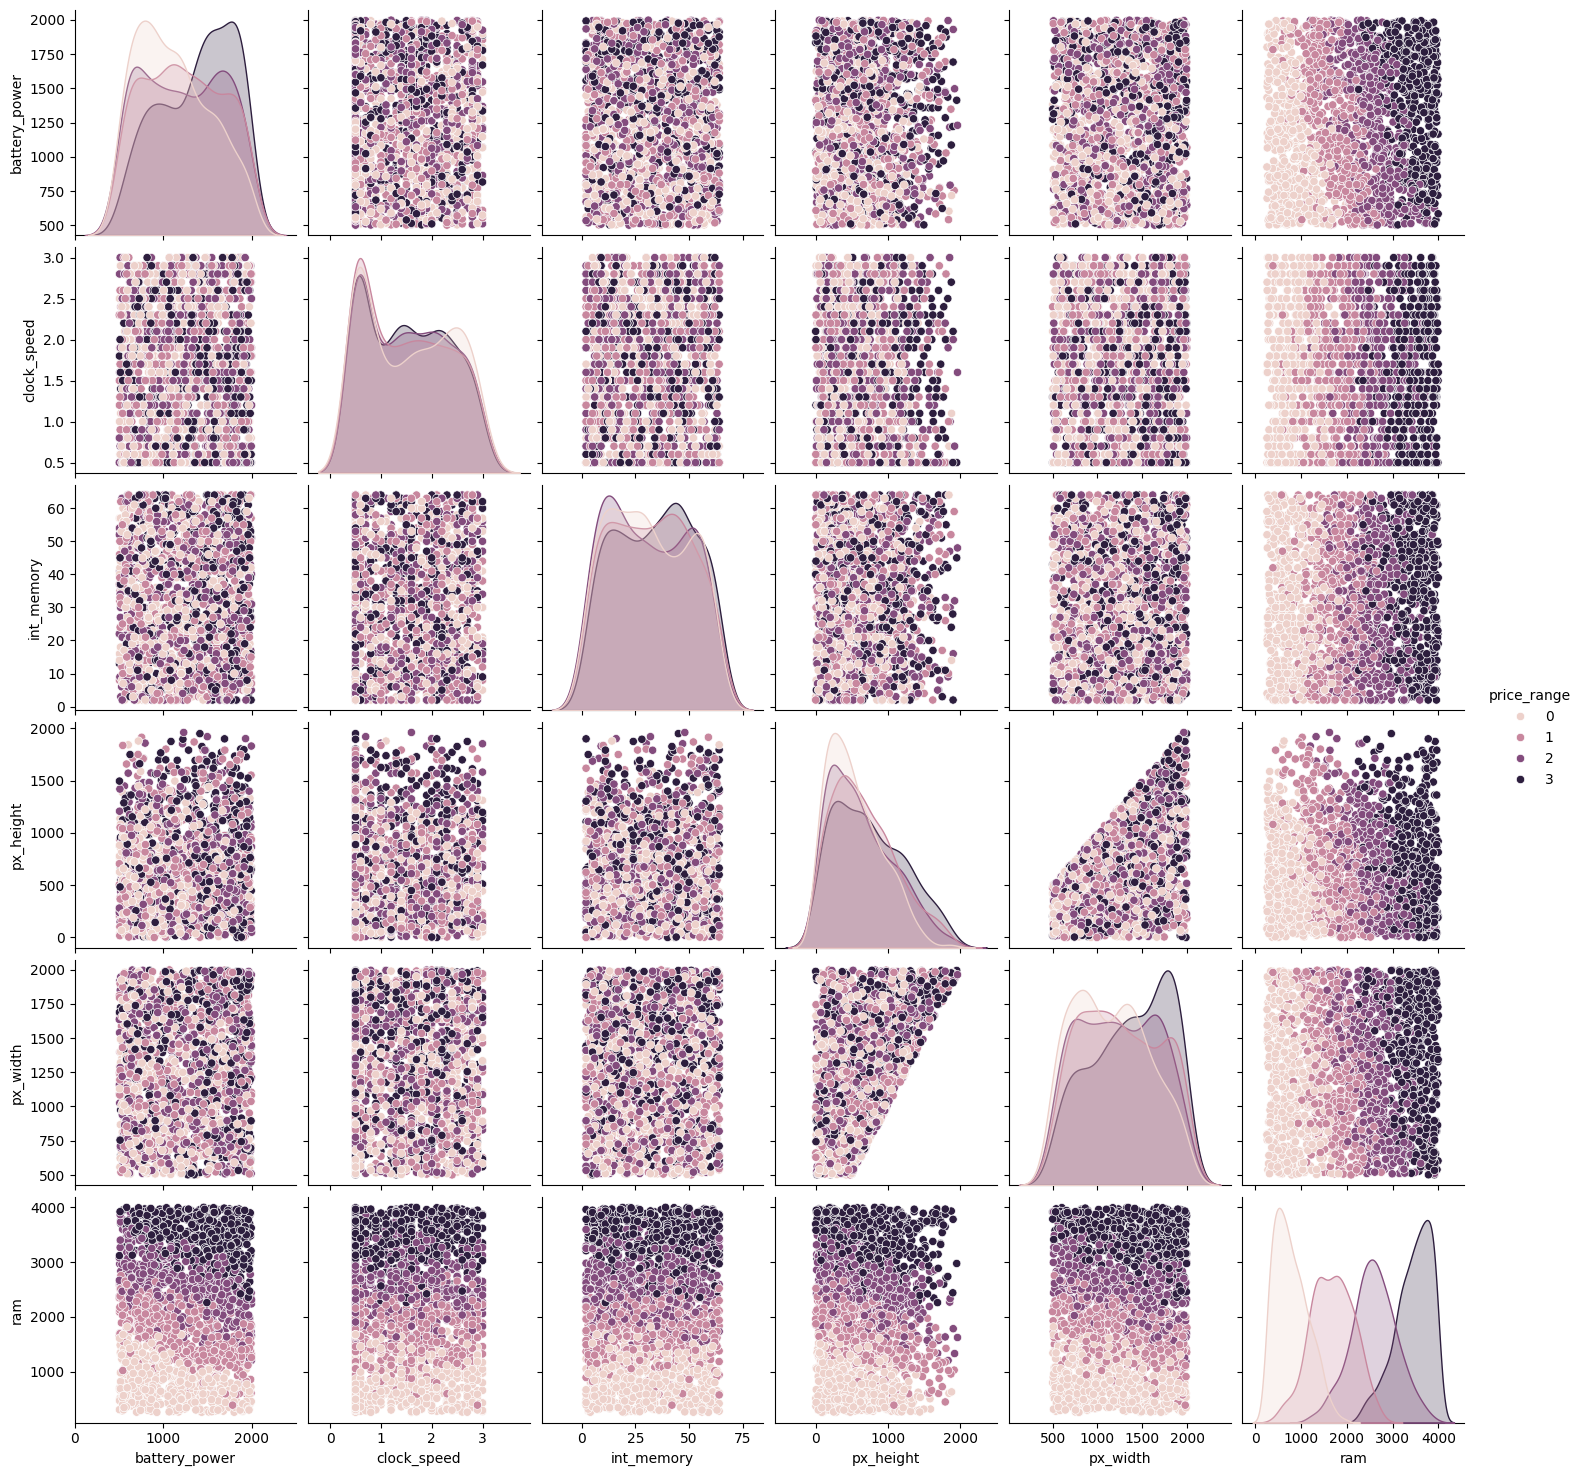

In [26]:
# Visualize scatter matrix with hue
p = sns.pairplot(df, hue="price_range")

<Axes: >

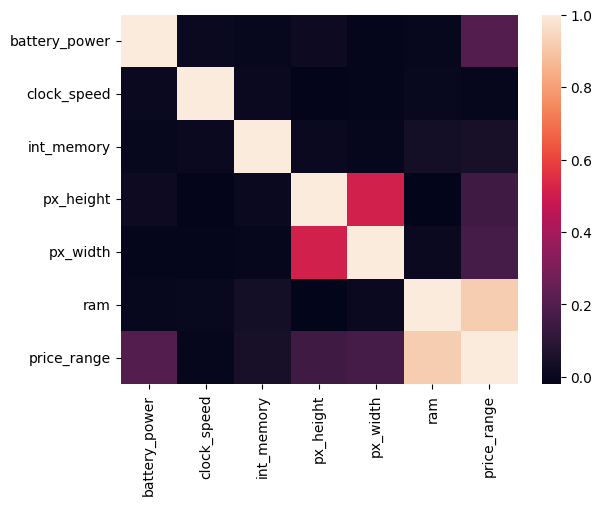

In [27]:
# Visualize a heatmap
sns.heatmap(df.corr(numeric_only=True))

# Task 3: Dimensionality Reduction with PCA

a) How many variables are in the database?

b) Perform a PCA decomposition of the data. Plot the resulting eigenvalues in decreasing order and select how many of them are needed in order to represent a 95\% of the variance in the data (scree plot).

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

c) Generate a table with the obtained eigenvectors and eigenvalues.

d) Project and represent the original data into the reduced dimensionality (2D and 3D) PCA space (PCA plot).

e) Color the PCA plot by the different categorical variables in the database. Can you reach any conclusion?




In [ ]:
# Variables in the dataset
variables_count = df.shape[1]
print(f"Number of variables: {variables_count}")


Number of variables 7


# PCA decomposition

In [58]:
# Separate class labels
x = df.drop("price_range", axis=1)
y = df["price_range"]

print(f"x.shape {x.shape}")
print(f"y.shape {y.shape}")

# Normalize data
xs = (x-x.mean(axis=0))/x.std(axis=0)

# Sample covariance matrix
c = np.cov(xs.T)

print(f"c.shape {c.shape}") # should be (n,n) matrix

# Perform diagonalization of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(c)
print(f"non-sorted eigen values: {eigenvalues}")

# Sort eigenvalues & eigenvectors
idx = eigenvalues.argsort()[::-1]   
eigval = eigenvalues[idx]
eigvec = eigenvectors[:,idx]
print(f"sorted eigen values: {eigval}")

# Explained variance by each principal component
var = eigval/np.sum(eigval)
print(f"PCA variance: {var}")

# Cumulative sum of the explained variance
cumsum = (eigval/np.sum(eigval)).cumsum()
print(f"PCA cumsum: {cumsum}")

# Eigenvectors
print(f"Eigenvectors: {eigvec}")

# Select principal components as necessary to keep 95% of variance
n_comp = (((eigval/np.sum(eigval)).cumsum()) < 0.96).sum()
keep = eigvec[:,:n_comp]
print(f"keep: {keep}")

# Data projection
xPCA = np.dot(xs,keep)
dfpca = pd.DataFrame(xPCA, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']) # we have kept 5 eigenvectors
print(f"dfpca.head(): \n {dfpca.head()}")

x.shape (2000, 6)
y.shape (2000,)
c.shape (6, 6)
non-sorted eigen values: [0.48777836 1.51152641 0.96759966 0.98771534 1.01127212 1.0341081 ]
sorted eigen values: [1.51152641 1.0341081  1.01127212 0.98771534 0.96759966 0.48777836]
PCA variance: [0.25192107 0.17235135 0.16854535 0.16461922 0.16126661 0.08129639]
PCA cumsum: [0.25192107 0.42427242 0.59281777 0.757437   0.91870361 1.        ]
Eigenvectors: [[-0.00827517 -0.0344963  -0.73959048  0.6652169  -0.09043881  0.03247694]
 [ 0.03310494  0.18246338 -0.66543851 -0.71490426  0.10795041 -0.00783406]
 [-0.00098594  0.70014889  0.06498897  0.01057959 -0.71038193  0.02850594]
 [-0.70696913  0.01004302 -0.02396292 -0.00310353 -0.01970848 -0.70648533]
 [-0.70605742  0.02001272  0.00372322 -0.03140197  0.04888629  0.70547332]
 [ 0.02263167  0.68906261  0.07338843  0.2128162   0.68756582 -0.03545662]]
keep: [[-0.00827517 -0.0344963  -0.73959048  0.6652169  -0.09043881]
 [ 0.03310494  0.18246338 -0.66543851 -0.71490426  0.10795041]
 [-0.00098

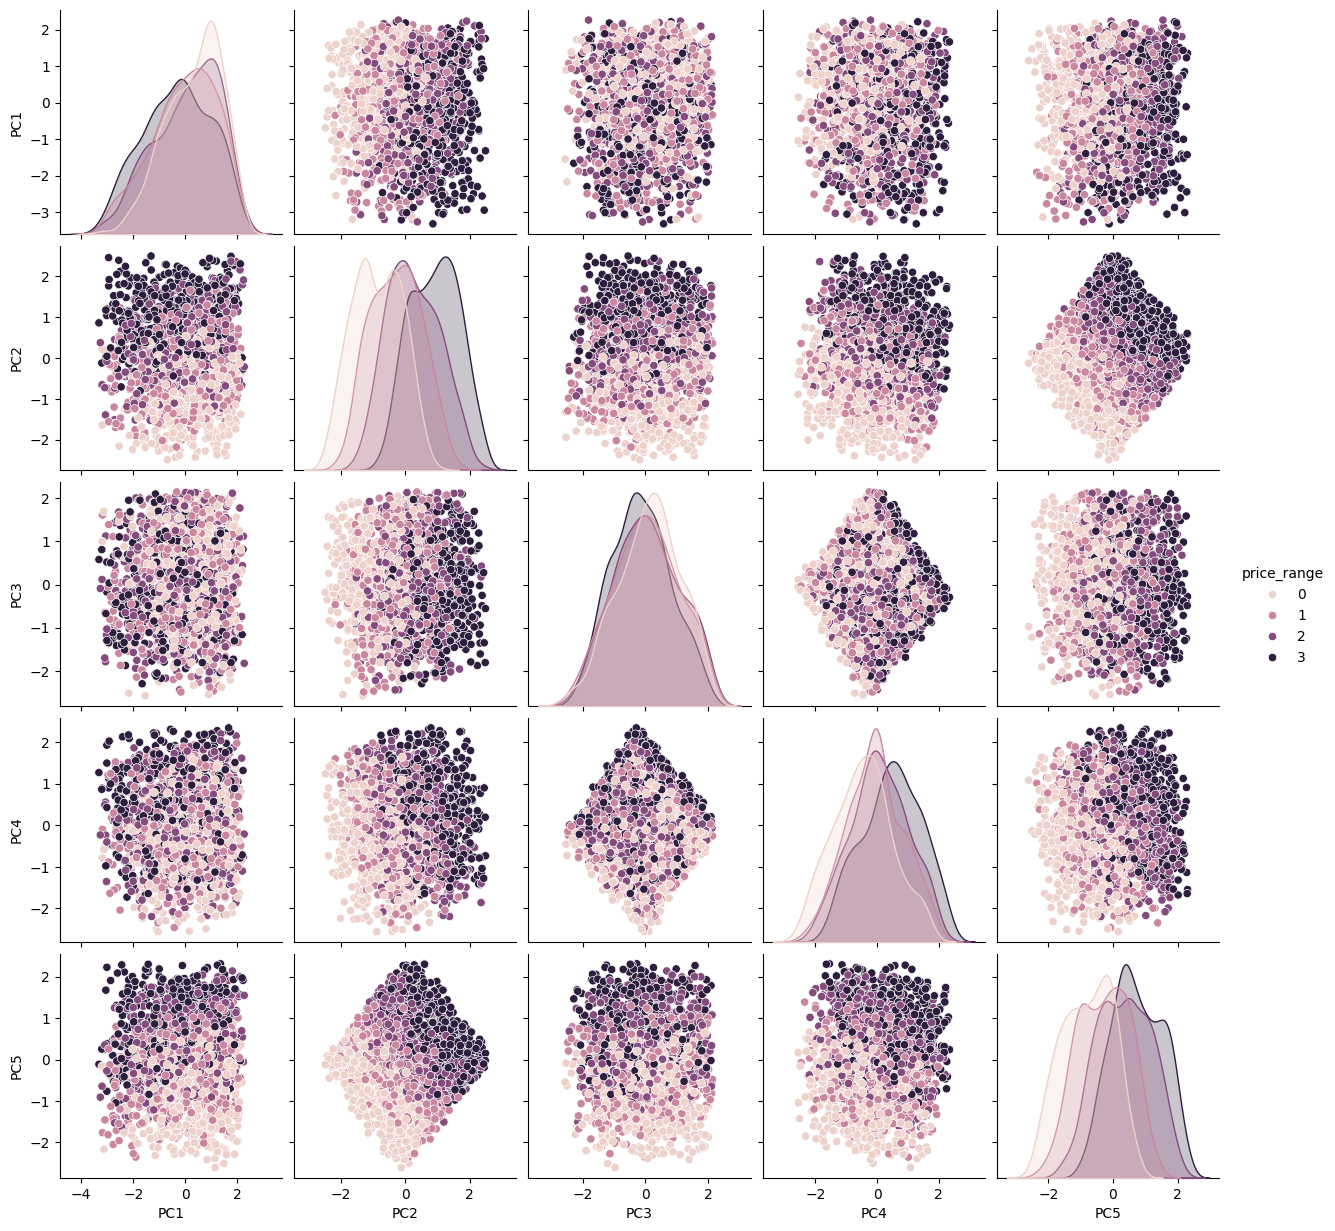

In [60]:
# Plot projections (1vs1)
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(8,8))
# ax = sns.scatterplot(x="PC1", y="PC2", hue=y, data=dfpca)
# plt.show()

# Plot all projections 
dfplot = dfpca
dfplot["price_range"] = y
p = sns.pairplot(dfpca, hue="price_range")

# PCA with sklearn

In [61]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(x)

# Checking with previous results
round((xs.values-XS).sum())

# Compute PCA with sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=XS.shape[1]).fit(XS)

# EigenValues == pca.explained_variance
print(f"pca.explained_variance_: {pca.explained_variance_}")

# EigenVectors == pca.components_ (NOTE: eigenvectors here are the rows not the columns)
print(f"pca.components_: {pca.components_}")

# Explained variance ratio by each component
print(f"pca.explained_variance_ratio_: {pca.explained_variance_ratio_}")

# Cumulative
print(f"pca.explained_variance_ratio_.cumsum(): {pca.explained_variance_ratio_.cumsum()}")

# Data transformation
xPCA = pca.transform(XS)

dfpca = pd.DataFrame(xPCA[:,:n_comp],columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

pca.explained_variance_: [1.51228255 1.03462542 1.01177801 0.98820945 0.9680837  0.48802237]
pca.components_: [[ 0.00827517 -0.03310494  0.00098594  0.70696913  0.70605742 -0.02263167]
 [-0.0344963   0.18246338  0.70014889  0.01004302  0.02001272  0.68906261]
 [ 0.73959048  0.66543851 -0.06498897  0.02396292 -0.00372322 -0.07338843]
 [-0.6652169   0.71490426 -0.01057959  0.00310353  0.03140197 -0.2128162 ]
 [ 0.09043881 -0.10795041  0.71038193  0.01970848 -0.04888629 -0.68756582]
 [ 0.03247694 -0.00783406  0.02850594 -0.70648533  0.70547332 -0.03545662]]
pca.explained_variance_ratio_: [0.25192107 0.17235135 0.16854535 0.16461922 0.16126661 0.08129639]
pca.explained_variance_ratio_.cumsum(): [0.25192107 0.42427242 0.59281777 0.757437   0.91870361 1.        ]


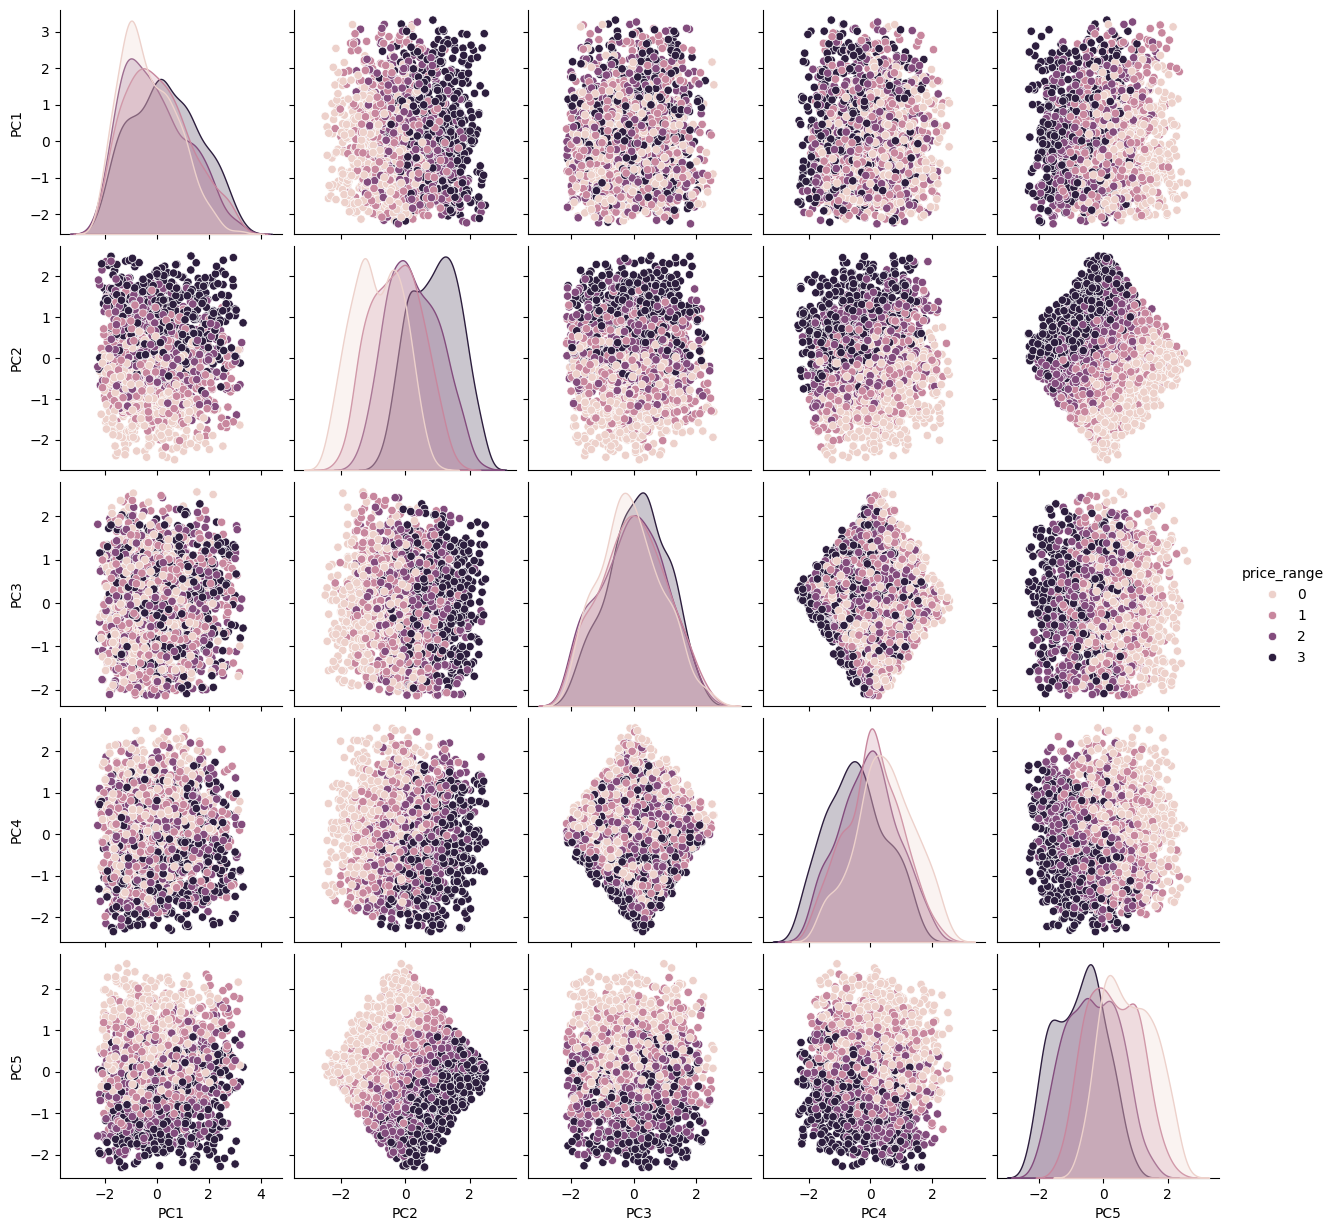

In [62]:
# Plot results
dfplot = dfpca
dfplot["price_range"] = y
p = sns.pairplot(dfpca, hue="price_range")